In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold
%matplotlib inline

In [4]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [6]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [7]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

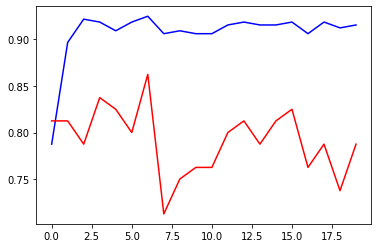

In [8]:
train_acc = []
test_acc = []

for n in range(1, 200, 10):
    clf = RandomForestClassifier(n_estimators=n, max_depth=2, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

In [19]:
train_list = []
val_list = []

data_split = KFold(10)

for n in range(1, 200, 10):
    
    val_acc = 0
    train_acc = 0
    
    for train_idx, val_idx in data_split.split(X_train, y_train):
        
        clf = ExtraTreesClassifier(n_estimators=n, max_depth=2, n_jobs=-1)
        clf.fit(X_train[train_idx], y_train[train_idx])

        train_acc += (clf.score(X_train[train_idx], y_train[train_idx]))
        val_acc += (clf.score(X_train[val_idx], y_train[val_idx]))
    
    train_list.append(train_acc / data_split.n_splits)
    val_list.append(val_acc / data_split.n_splits)
    
plt.plot(train_list, 'b-')
plt.plot(val_list, 'r-')

KeyboardInterrupt: 

In [23]:
data_split.n_splits

10

In [22]:
data_split = KFold(10)
for train_idx, val_idx in data_split.split(X_train, y_train):
    print(X_train[train_idx])
    print('----------')
    print(X_train[val_idx])
    print('<---------->')

[[-0.98142253 -0.52819341  2.40570482]
 [ 1.01892912 -1.57742635  0.07335321]
 [-0.98142253 -0.81434785  0.40227459]
 [-0.98142253  0.71180917 -0.73399928]
 [ 1.01892912  1.09334843 -0.1359604 ]
 [-0.98142253  0.13950029  0.04345126]
 [ 1.01892912 -0.24203896 -0.94331288]
 [-0.98142253 -0.71896303  0.28266681]
 [-0.98142253  1.47488768 -1.06292066]
 [-0.98142253 -1.29127191 -1.27223426]
 [ 1.01892912  0.2348851  -0.31537206]
 [-0.98142253 -0.43280859 -0.55458761]
 [ 1.01892912  0.04411548 -0.25556818]
 [-0.98142253  0.9025788  -1.18252843]
 [-0.98142253  1.66565731  1.80766594]
 [ 1.01892912  0.42565473  0.31256876]
 [-0.98142253 -0.62357822 -1.06292066]
 [ 1.01892912  0.2348851   0.16305904]
 [-0.98142253  0.71180917 -1.42174398]
 [ 1.01892912  0.42565473  0.10325515]
 [-0.98142253  1.85642693 -1.0928226 ]
 [-0.98142253  0.42565473  0.16305904]
 [-0.98142253 -0.71896303  1.38903873]
 [ 1.01892912 -0.24203896  0.16305904]
 [ 1.01892912 -0.71896303  0.31256876]
 [-0.98142253 -1.86358079